## Power Analysis for Two-Sample T-Test

This notebook demonstrates how to perform a power analysis for a two-sample t-test using Python, without relying on external libraries like `statsmodels`, which would make calculation even easier. 

#### What is Power Analysis?

Power analysis is a statistical method used to determine the minimum sample size needed to detect a statistically significant difference between two groups, if a difference truly exists. It helps researchers design studies that are adequately powered to find meaningful results.

#### Key Factors in Power Analysis

* **Effect Size:**  A measure of the magnitude of the effect being investigated (e.g., Cohen's d).
* **Significance Level (Alpha):** The probability of rejecting the null hypothesis when it is true (Type I error).
* **Power (1-Beta):** The probability of correctly rejecting the null hypothesis when it is false (i.e., the probability of detecting a true effect).   


In [30]:
import numpy as np
from scipy import stats

def power_analysis_ttest(effect_size, n1, n2=None, alpha=0.05, alternative='two-sided'):
    """
    Perform power analysis for a two-sample t-test.
    
    Parameters:
    - effect_size: Cohen's d (standardized effect size)
    - n1: Sample size of group 1
    - n2: Sample size of group 2 (if None, assumed equal to n1)
    - alpha: Significance level (default: 0.05)
    - alternative: 'two-sided', 'less', or 'greater' (default: 'two-sided')
    
    Returns:
    - power: Statistical power (1 - β)
    """
    if n2 is None:
        n2 = n1
    
    df = n1 + n2 - 2
    
    # Calculate non-centrality parameter
    ncp = effect_size * np.sqrt(n1 * n2 / (n1 + n2))
    
    if alternative == 'two-sided':
        crit_value = stats.t.ppf(1 - alpha / 2, df)
        power = 1 - stats.nct.cdf(crit_value, df, ncp) + stats.nct.cdf(-crit_value, df, ncp)
    elif alternative == 'less':
        crit_value = stats.t.ppf(alpha, df)
        power = stats.nct.cdf(crit_value, df, ncp)
    elif alternative == 'greater':
        crit_value = stats.t.ppf(1 - alpha, df)
        power = 1 - stats.nct.cdf(crit_value, df, ncp)
    else:
        raise ValueError("Alternative must be 'two-sided', 'less', or 'greater'")
    
    return power

# Example usage
effect_size = 0.5  # medium effect size
n1 = n2 = 100  # sample sizes
alpha = 0.05  # significance level

power = power_analysis_ttest(effect_size, n1, n2, alpha)
print(f"Power: {power:.4f}")

# Calculate required sample size for a given power
target_power = 0.8
n = 10
while power_analysis_ttest(effect_size, n) < target_power:
    n += 1

print(f"Required sample size per group for {target_power:.1f} power: {n}")

Power: 0.9404
Required sample size per group for 0.8 power: 64


## Using statsmodel package to perform power analysis easily

In [27]:
from statsmodels.stats.power import TTestIndPower

def perform_power_analysis(effect_size, alpha=0.05, power=0.8, ratio=1.0):
    """
    Perform power analysis for two-sample t-test.
    
    :param effect_size: Cohen's d effect size
    :param alpha: Significance level (Type I error)
    :param power: Desired statistical power (1 - Type II error)
    :param ratio: Ratio of sample size for group 1 to group 2
    :return: Required sample size for each group
    """
    analysis = TTestIndPower()
    result = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)

    return np.ceil(result)

# Example usage
effect_size = 0.5 # Considerd medium effect
alpha = 0.05
power = 0.80

n = perform_power_analysis(effect_size, alpha, power)
print(f"Required sample size per group: {n}")


Required sample size per group: 64.0


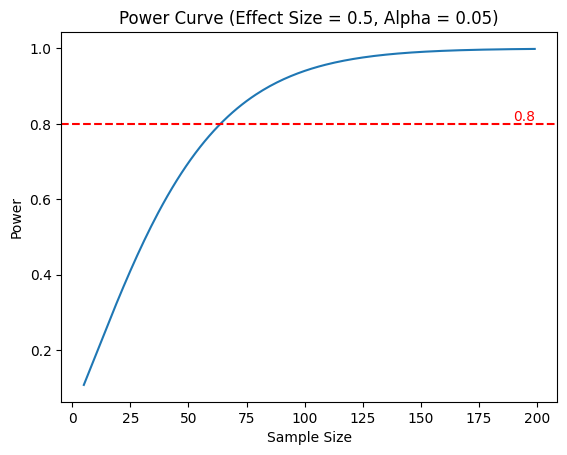

In [28]:
import matplotlib.pyplot as plt

def plot_power_curve(effect_size, alpha=0.05, ratio=1.0):
    """
    Plot the power curve for a range of sample sizes.
    
    :param effect_size: Cohen's d effect size
    :param alpha: Significance level (Type I error)
    :param ratio: Ratio of sample size for group 1 to group 2
    """
    analysis = TTestIndPower()
    sample_sizes = np.arange(5, 200)
    power = analysis.power(effect_size=effect_size, nobs1=sample_sizes, alpha=alpha, ratio=ratio)
    
    plt.plot(sample_sizes, power)
    plt.xlabel('Sample Size')
    plt.ylabel('Power')
    plt.title(f'Power Curve (Effect Size = {effect_size}, Alpha = {alpha})')
    plt.axhline(y=0.8, color='r', linestyle='--')
    plt.text(max(sample_sizes), 0.8, '0.8', verticalalignment='bottom', horizontalalignment='right', color='r')
    plt.show()


# Plot power curve
plot_power_curve(effect_size, alpha)

In [29]:
# Calculate power for a given sample size
given_sample_size = 50

calculated_power = TTestIndPower().power(effect_size=effect_size, nobs1=given_sample_size, alpha=alpha)

print(f"Power with sample size of {given_sample_size}: {calculated_power:.4f}")

Power with sample size of 50: 0.6969


## Understanding Cohen's d

Cohen's d is a measure of effect size that indicates the standardized difference between two means. It tells you how many standard deviations apart the means of two groups are.

### Interpretation of Cohen's d:

* **Small effect: d** = 0.2
* **Medium effect: d** = 0.5
* **Large effect: d** = 0.8

In [21]:
import numpy as np
from scipy import stats

def cohens_d(group1, group2):
    """
    Calculate Cohen's d for two groups.
    
    :param group1: List or numpy array of values for group 1
    :param group2: List or numpy array of values for group 2
    :return: Cohen's d value
    """
    # Convert to numpy arrays
    group1 = np.array(group1)
    group2 = np.array(group2)
    
    # Calculate the size of samples
    n1, n2 = len(group1), len(group2)
    
    # Calculate the variance of the samples
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    
    # Calculate the pooled standard deviation
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    
    # Calculate Cohen's d
    d = (np.mean(group1) - np.mean(group2)) / pooled_std
    
    return d


Cohen's d: 3.1623
The effect size is large.
P-value: 0.0011


In [ ]:
# Example usage
group1 = [6, 7, 8, 9, 10]
group2 = [1, 2, 3, 4, 5]

effect_size = cohens_d(group1, group2)
print(f"Cohen's d: {effect_size:.4f}")

In [ ]:
# Interpret the effect size
if abs(effect_size) < 0.2:
    interpretation = "very small"
elif abs(effect_size) < 0.5:
    interpretation = "small"
elif abs(effect_size) < 0.8:
    interpretation = "medium"
else:
    interpretation = "large"

print(f"The effect size is {interpretation}.")

In [ ]:
# Calculate p-value
t_statistic, p_value = stats.ttest_ind(group1, group2)
print(f"P-value: {p_value:.4f}")

# Interpret the results considering both effect size and p-value
if p_value > 0.05:
    print("However, the difference is not statistically significant (p > 0.05).")
    print("This suggests that while there may be an effect, we cannot be confident")
    print("that it's not due to random chance in our sample.")
else:
    print("This difference is statistically significant (p ≤ 0.05).")